## **USA accidents data (March'22 - March'23) analysis**

### **Importing the necessary liabraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Mounting Google Drive in Colab**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **1. Overview of the Data**

#### **1.1 Source**
The dataset on Accidents in USA has been taken from Kaggle.This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records.

#### **1.2 The Data**
The data has been published since 2016 to 2023 currently and we have taken the data from March 2022 to March 2023 for our analysis.

This dataset was collected in real-time using multiple Traffic APIs.

'**ID**': This is a unique identifier of the accident record. 1709346 unique values (for March'22-March'23).

'**Source**': Source of raw accident data.
Source1: 56%
Source2: 43%
Other (97389): 1%

'**Severity**':  Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

**LOCATION AND TIME ATTRIBUTES(16)**

'**Start_Time**': Shows start time of the accident in the local time zone.

'**End_Time**': Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.

'**Start_Lat**' : Shows latitude in GPS coordinate of the start point.

'**Start_Lng**': Shows longitude in GPS coordinate of the start point.

'**End_Lat**': Shows latitude in GPS coordinate of the end point.

'**End_Lng**': Shows longitude in GPS coordinate of the end point.

'**Distance(mi)**': The length of the road extent affected by the accident in miles.

'**Description**': Shows a human provided description of the accident.

'**Street**': Shows the street name in address field.

'**City**': Shows the city in address field.

'**County**': Shows the county in address field.

'**State**': Shows the state in address field.

'**Zipcode**': Shows the zipcode in address field.

'**Country**': Shows the country in address field.

'**Timezone**': Shows timezone based on the location of the accident (eastern, central, etc.).

'**Airport_Code**': Denotes an airport-based weather station which is the closest one to location of the accident.

**ATMOSPHERE ATTRIBUTES (10)**

'**Weather_Timestamp**': Shows the time-stamp of weather observation record (in local time).

'**Temperature(F)**': Shows the temperature (in Fahrenheit).

'**Wind_Chill(F)**': Shows the wind chill (in Fahrenheit).

'**Humidity(%)**': Shows the humidity (in percentage).

'**Pressure(in)**': Shows the air pressure (in inches).

'**Visibility(mi)**': Shows visibility (in miles).

'**Wind_Direction**': Shows wind direction.

'**Wind_Speed(mph)**': Shows wind speed (in miles per hour)

'**Precipitation(in)**': Shows precipitation amount in inches, if there is any.

'**Weather_Condition**': Shows the weather condition (rain, snow,
thunderstorm, fog, etc.)

**ROAD FACTORS(13)**

'**Amenity**': presence of amenity in a nearby location.

'**Bump**': A POI annotation which indicates presence of speed bump or hump in a nearby location.

'**Crossing**': A POI annotation which indicates presence of crossing in a nearby location.

'**Give_Way**',: A POI annotation which indicates presence of give_way in a nearby location.

'**Junction**': A POI annotation which indicates presence of junction in a nearby location.

'**No_Exit**': A POI annotation which indicates presence of no_exit in a nearby location.

'**Railway**': presence of railway in a nearby location.

'**Roundabout**': presence of roundabout in a nearby location.

'**Station**': A POI annotation which indicates presence of station in a nearby location

'**Stop**': presence of stop in a nearby location.

'**Traffic_Calming**': presence of traffic_calming in a nearby location.

'**Traffic_Signal**':  presence of traffic_signal in a nearby location.

'**Turning_Loop**',  presence of turning_loop in a nearby location.

'**Sunrise_Sunset**': Shows the period of day (i.e. day or night) based on sunrise/sunset.

'**Civil_Twilight**': Shows the period of day (i.e. day or night) based on civil twilight.

'**Nautical_Twilight**': Shows the period of day (i.e. day or night) based on nautical twilight.

'**Astronomical_Twilight**': Shows the period of day (i.e. day or night) based on astronomical twilight.

#### **1.3 Purpose**
This data can help us find trends and patterns related to the accidents happening in the USA and might help in preventing accidents further by taking all the necessary steps. The aim of this project is to analyse the data and ask questions which will help us better understand the current state. For this purpose we have designed the project in a manner where we have asked questions which help us in our analysis and we will answer those questions step by step. Moreover, we have formulated a few hypotheses in order to find in-depth information about some columns in the dataset. We have also tested our data using the Machine Learning model of Logistic Regression.

The following sections contain:
  1. Data Pre-processing
  2. Descriptive Statistics
  3. Exploratory Data Analysis (EDA)
  4. Hypothesis Testing
  5. Logistic Regression
  6. Conclusion and Solutions

In [3]:
# Store the csv file path in a variable
path = '/content/drive/MyDrive/Colab Files/us_accident_2022_2023.csv'

#### **View Data**

In [4]:
# Use the above variable 'path' in the code below to get the data from the csv file
df = pd.read_csv(path)

In [5]:
# To view a few rows from top
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-512230,Source2,1,2022-09-08 05:49:30,2022-09-08 06:34:53,41.946796,-88.208092,NaN,NaN,0.00,...,False,False,False,False,True,False,Night,Night,Day,Day
1,A-512231,Source2,1,2022-09-08 02:02:05,2022-09-08 04:31:32,34.521172,-117.958076,NaN,NaN,0.00,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-512232,Source2,1,2022-09-08 05:14:12,2022-09-08 07:38:17,37.542839,-77.441780,NaN,NaN,0.00,...,False,False,False,False,True,False,Night,Night,Night,Night
3,A-512233,Source2,1,2022-09-08 06:22:57,2022-09-08 06:52:42,40.896629,-81.178452,NaN,NaN,0.00,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-512234,Source2,2,2022-09-08 06:36:20,2022-09-08 07:05:58,41.409359,-81.644318,NaN,NaN,1.91,...,False,False,False,False,False,False,Night,Day,Day,Day


### **2. Data Pre-processing**

In [6]:
# To view all the columns and their respective data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709346 entries, 0 to 1709345
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
## Detecting all the Null values in the dataset in descending order
df.isna().sum().sort_values(ascending = False)


End_Lat                  171720
End_Lng                  171720
Precipitation(in)         65278
Wind_Chill(F)             54680
Wind_Direction            48548
Wind_Speed(mph)           48541
Visibility(mi)            41562
Humidity(%)               41418
Weather_Condition         38915
Temperature(F)            38789
Pressure(in)              33555
Weather_Timestamp         30298
Nautical_Twilight         13792
Civil_Twilight            13792
Sunrise_Sunset            13792
Astronomical_Twilight     13792
Airport_Code               6976
Street                     6729
Timezone                   1663
Zipcode                     342
City                         50
Traffic_Signal                0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Country                       0
Turning_Loop                  0
No_Exit                       0
End_Time                      0
Start_Time                    0
Severity

In [8]:
## Dropping a few columns
df.drop(['End_Lng', 'End_Lat','Zipcode','Source','Street','Description'],axis=1,inplace=True)

**Note:-** We have dropped columns 'End_Lng' and 'End_Lat' as it contains many NA values that may lead to inaccurate analysis. The other columns have been dropped as they do not serve any purpose in our analysis.

In [9]:
## Filling null values with the mean of the particular columns

df['Precipitation(in)'].fillna(df['Precipitation(in)'].mean(),inplace=True)
df['Temperature(F)'].fillna(df['Temperature(F)'].mean(),inplace=True)
df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean(),inplace=True)
df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean(),inplace=True)
df['Humidity(%)'].fillna(df['Humidity(%)'].mean(),inplace=True)
df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean(),inplace=True)
df['Pressure(in)'].fillna(df['Pressure(in)'].mean(),inplace=True)

In [10]:
## Converting the start time and end time into datetime format and making new columns - Year, month, days

df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])


In [11]:
### to extract hour, month and year from a timestamp that we created from the above code

df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df.Start_Time.dt.dayofweek

### **3. Descriptive Statistics**

In [12]:
## Descriptive Statistics of all the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,1709346.0,2.062644,0.392819,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,1709346.0,36.100777,5.076367,24.554800,33.389290,36.092595,40.026551,49.000504
Start_Lng,1709346.0,-93.752688,17.581268,-124.541015,-117.134825,-85.558800,-80.109898,-68.283783
Distance(mi),1709346.0,0.926659,2.069106,0.000000,0.061000,0.269000,0.971000,336.570007
Temperature(F),1709346.0,63.799035,18.771172,-45.000000,52.000000,66.000000,78.000000,207.000000
Wind_Chill(F),1709346.0,62.636112,20.807189,-69.000000,52.000000,66.000000,78.000000,207.000000
Humidity(%),1709346.0,62.997765,22.655813,1.000000,46.000000,63.000000,82.000000,100.000000
Pressure(in),1709346.0,29.333615,1.142433,0.000000,29.180000,29.670000,29.940000,58.630000
Visibility(mi),1709346.0,9.121306,2.368391,0.000000,10.000000,10.000000,10.000000,90.000000
Wind_Speed(mph),1709346.0,7.673056,5.473251,0.000000,5.000000,7.000000,10.000000,190.000000


## **EDA (Exploratory Data Analysis)**

In [13]:
# View all the data columns
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'City', 'County', 'State', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Day', 'Hour', 'Weekday'],
      dtype='object')

#### **Q: Which states have higher number of accident counts?**

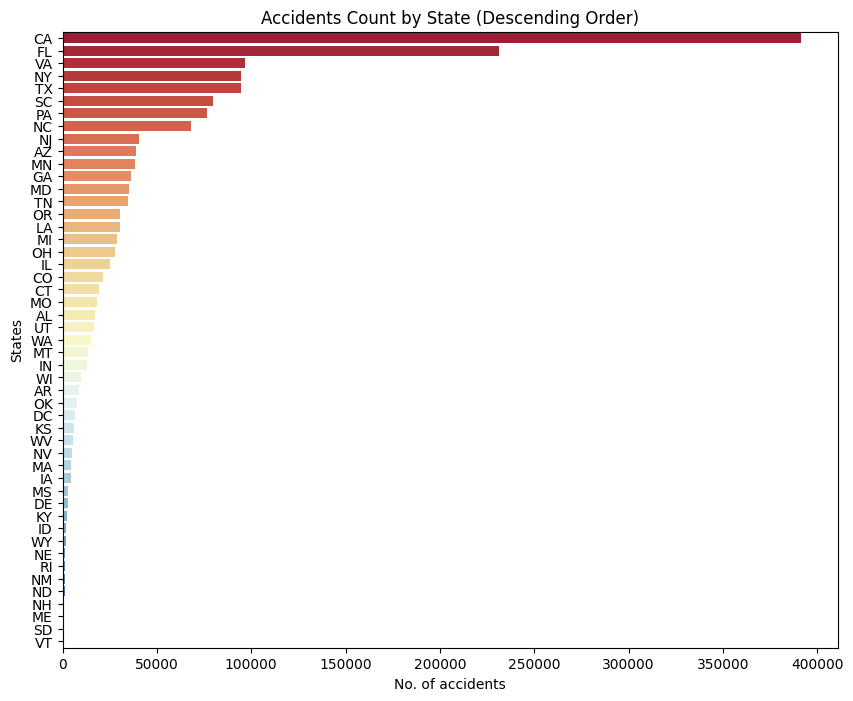

In [14]:
state_count = df['State'].value_counts()
sorted_states = state_count.index.tolist()

plt.figure(figsize=(10, 8))
sns.barplot(x=state_count, y=sorted_states, order=sorted_states,palette = 'RdYlBu')
plt.title('Accidents Count by State (Descending Order)')
plt.xlabel('No. of accidents')
plt.ylabel('States')
plt.yticks(size =10);

In [15]:
print('Total number of accidents in all the states are:',state_count.sum())

Total number of accidents in all the states are: 1709346



- We have used the function `value_counts()` to store the number of accidents state-wise in a descending order and store it in a variable called 'state_counts'.
- Then we have another variable 'sorted_states' which contains the index values of the above variable converted into a list format to use as y-labels in the plot.

**The analysis of the above plot:**
- The state with highest accident count is **California (CA)** having about `3,91,134` accidents in the year. It makes up about **22.8%** of all the accidents.
- The second most highest is the state of **Florida** with `2,31,305` accidents in the year. It makes up about **13.5%** of the total.

**Possible Reasons:**
 - **Population Density**:
    
    California and Florida are among the most populous states in the United States. Higher population density often correlates with increased vehicular traffic, leading to a higher likelihood of accidents.
 - **Urbanization**:

    Both California and Florida have major urban centers with dense road networks and heavy traffic congestion. Urban areas tend to have higher accident rates due to increased vehicle interactions, pedestrian activity, and complex traffic patterns.
 - **Tourism and Travel**:

    Florida is a popular tourist destination known for its beaches, theme parks, and attractions. Increased tourism leads to more vehicles on the roads, especially during peak travel seasons, which can contribute to higher accident rates.
    California also attracts a large number of tourists and travelers due to its diverse attractions, including national parks, beaches, and cities like Los Angeles and San Francisco.
 - **Weather Conditions**:

    California and Florida experience various weather conditions that can impact road safety. For example, California may experience wildfires, fog, and heavy rain, while Florida is prone to hurricanes, thunderstorms, and flooding. Inclement weather can increase the risk of accidents due to reduced visibility, slippery roads, and impaired driving conditions.

#### **Q: How many cities have accidents beyond 1000 per year?**

In [16]:
## Calculating value counts of accidents in all the cities (it is counted in descending order)
accidents_by_cities =df['City'].value_counts()
print("Total number of cities that have reported accidents:", len(accidents_by_cities))

Total number of cities that have reported accidents: 10349


In [17]:
## To see the percentage of the accidents that are above 1000 in number
highest_accidents = accidents_by_cities[accidents_by_cities >= 1000]

In [18]:
percent_highest_accidents = len(highest_accidents)/len(accidents_by_cities)
print('Percentage of cities that reported more than 1000 accidents:', round(percent_highest_accidents,2))

Percentage of cities that reported more than 1000 accidents: 0.03


**Conclusion:**
- **3%**, of cities have `more than a 1000 accidents`. That indicates a large part of the accident data is concentrated to a very few cities corresponding to population density, infrastructure and other factors.


#### **Histogram of accidents in cities**
  - This plot below will show us the density of number of accidents. In the figure below we can see that the trend is decreasing meaning as we ***increase the number of accidents we get a lot fewer cities*** that report
  huge number of accidents.
  - For example, the point where 10 is raised to power 0 i.e. 1 the plot shows value above 800 on the y-axis, we have also shown a code where we checked cities with only 1 accident report in the entire year. Turns out a large portion of cities have reported only 1 accident.
  - It can also be inferred from the plot that the a huge chunk of accident numbers are concentrated in the range of 1-1000.

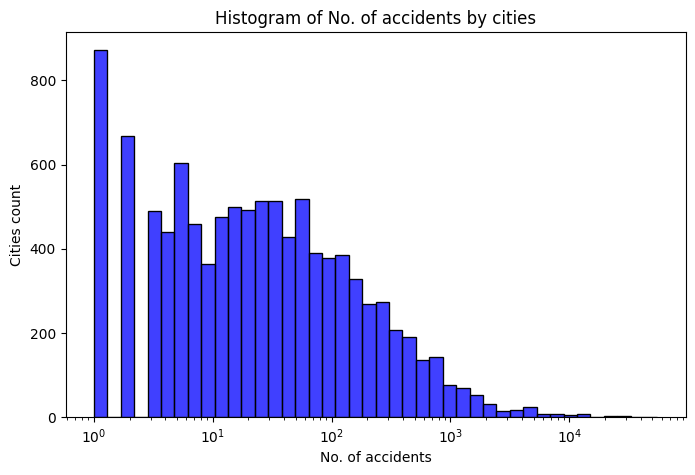

In [19]:
# Histogram of accidents by cities
plt.figure(figsize = (8,5))
sns.histplot(accidents_by_cities, log_scale = True,color='blue')     # since, the data is highly skewed to left we use log_scale to present it clearly
plt.title('Histogram of No. of accidents by cities')
plt.xlabel('No. of accidents')
plt.ylabel('Cities count');


####**Q: Which are the top 50 cities with highest accidents?**

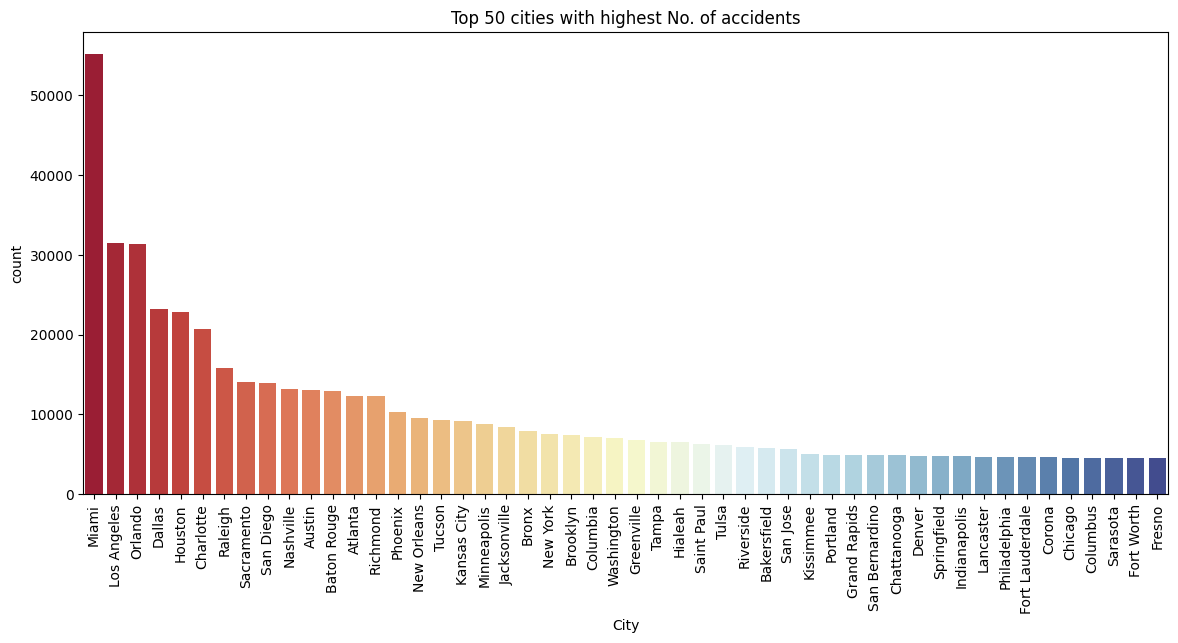

In [20]:
sorted_cities = accidents_by_cities.head(50)
cities = sorted_cities.index.tolist()
plt.figure(figsize=(14,6))
sns.countplot(x='City', data =df, order = cities,palette = 'RdYlBu')
plt.title('Top 50 cities with highest No. of accidents')
plt.xticks(rotation =90);

**Conclusion:**
- Most accidents occur in **Miami** city, about **55,154** accidents in the year. Miami is a city in Florida(FL) state.
- The second and third place is taken by **Los Angeles (CA)** and **Orlando (FL)** respectively. But their numbers are much lower (31,000 approx.) in comparison to Miami.

#### **Q: What is the share of accidents according to timezones**

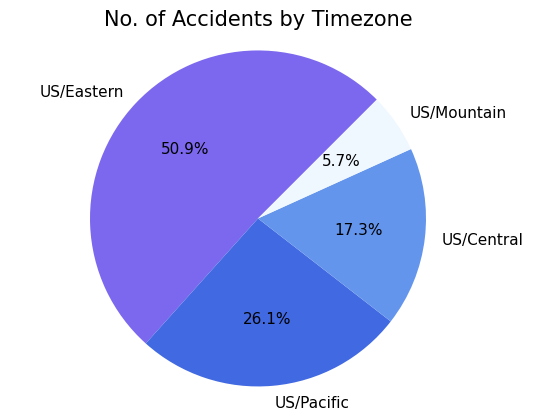

In [21]:
# Pie chart of distribution of time zones
timezone = df['Timezone'].value_counts()
zones = timezone.index.tolist()
plt.pie(timezone, labels=zones, autopct='%1.1f%%', colors=['mediumslateblue','royalblue','cornflowerblue','aliceblue'],startangle=45,textprops = {'fontsize' : 11})
plt.title('No. of Accidents by Timezone',fontsize=15)
plt.axis('equal');

**Conclusion:**
- Most accidents occured in the Eastern zone (50.9%) of the US followed by Pacific (26.1%), Central (17.3%) and least in Mountain (5.7%).
- This can account to a high number of cities that recorded most accidents are in the eastern zone.

#### **Q: Which hours were the most dangerous?**

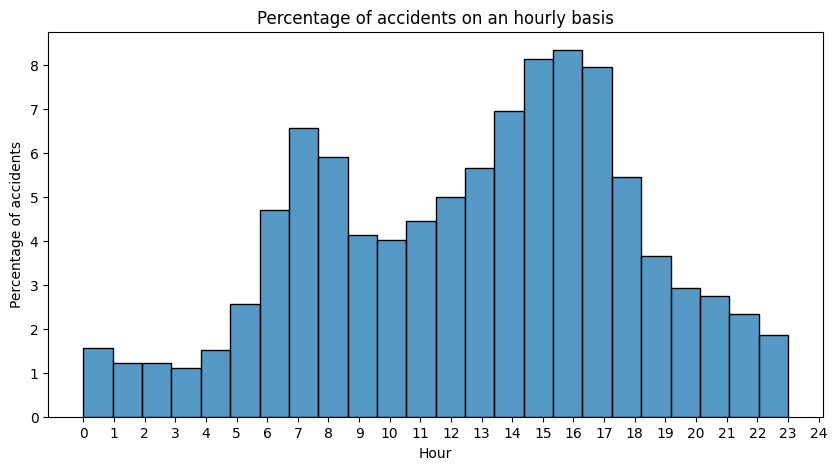

In [22]:
# create histogram of the hourly data
plt.figure(figsize=(10,5))
sns.histplot(df['Hour'], bins = 24, stat='percent')
plt.xticks(range(25))
plt.ylabel('Percentage of accidents')
plt.title('Percentage of accidents on an hourly basis');

**Conclusion:** More accident Prone hours are:-
- **Morning rush hour (6 AM - 9 AM):** These are the morning peak hours as people rush to school and office. It can be inferred that people ususally are in a hurry to get to work, moreover, in the morning hours drivers are distracted as they are still adjusting to the daylight, other reasons for distractions can be lack of sleep.
- **Evening rush hour (2 PM - 6 PM):** These are the evening rush hours, school and offices dismissal hours, more traffic and congestion, people are seen to rashly drive to beat traffic, not following rules.

#### **Q: Which months saw the most accidents?**

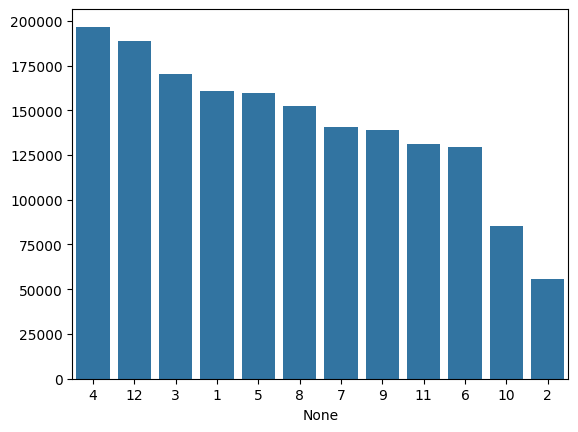

In [23]:
sns.barplot(y=df['Month'].value_counts().values, x= df['Month'].value_counts().index,order = df['Month'].value_counts().index);

**Conclusion:**

- Highest accidents were recorded in **April and December**, followed by **March and Jaunuary**.
- We can see a trend here, the above four months include two of winters and two of spring time. Here is an analysis for why there could be more accidents in these two seasons:

  - **Winter :** It is logical that the winter time with snow-covered roads, chilling winds among many other things, is more prone to accidents and hence we see a spike in rates in December and January months.
  - **Spring :** While it may not occur to most people at first glance that spring time can also be quite dangerous time to drive, here are some reasons that we found are major causes.

      - ***Fatigued Driving:*** Every spring, we set our clocks forward one hour. Unfortunately, some people can take a while to get adjusted to the time change and feel more tired during the day.
      - ***Sun glare:*** Another common cause of springtime car accidents. Since the sun's rays tend to be much stronger in the spring, it can make it difficult for drivers to see the road ahead. This can increase the risk of an accident.
      - ***Bicyclists:*** As the temperatures get warmer, there may be more bicyclists on the road. With the increased number of bicyclists, accidents are more likely to occur. Common causes of bicycle accidents include speeding, car doors, left-hand turns and distractions.


#### **Q: Which days of the week saw most accidents?**

In [24]:
# map() function applies the given function to each item of the column 'Weekday' and returns a new Seires 'days_of_week' with the results.
days_of_week = df['Weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

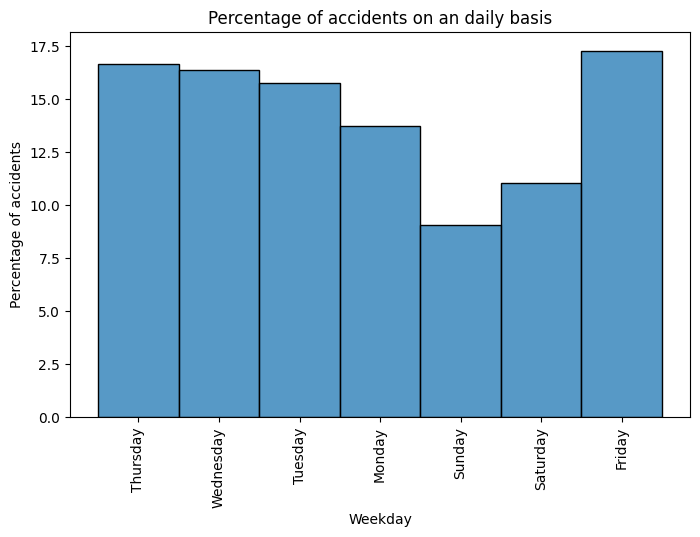

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(days_of_week, bins = 7, stat='percent', discrete = True)
plt.ylabel('Percentage of accidents')
plt.xticks(rotation = 90)
plt.title('Percentage of accidents on an daily basis');

**Conclusion**:

The accidents are **more often on weekdays** than on weekends.

This analysis can be combined with the analysis of hourly data as we concluded above that the most accidents occur at peak hours when people are either going to or coming from work, hence, it also corresponds to the daily data where most accidents happen on weekdays when people go to work. Moreover, the day with highest reporting numbers is **Friday**.

To understand the analysis of how the weekend hourly data is different from weekdays data we have shown below separate plots for Sunday and Monday hourly data alongwith Friday (as it had most number of accidents).

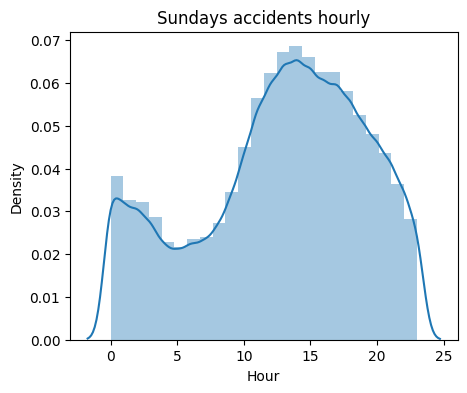

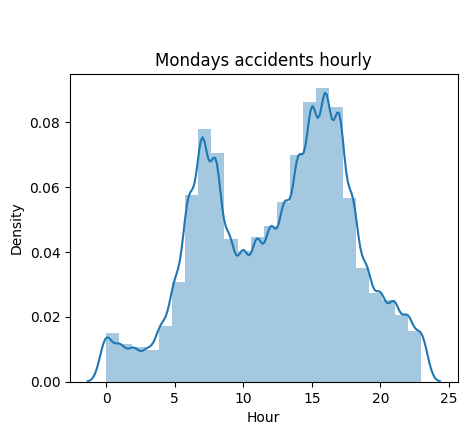

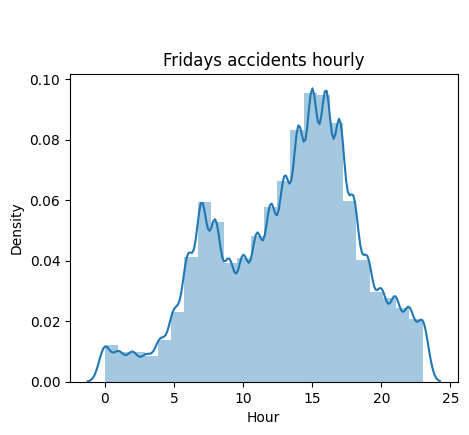

In [26]:
sundays_start_time = df[df['Weekday'] == 6]
mondays_start_time = df[df['Weekday'] == 0]
fridays_start_time = df[df['Weekday'] == 4]

plt.figure(figsize=(5,4))
sns.distplot(sundays_start_time['Hour'], bins = 24,norm_hist = True, kde = True)
plt.title('Sundays accidents hourly')

plt.figure(figsize=(5,4))
sns.distplot(mondays_start_time['Hour'], norm_hist = True,bins = 24, kde = True)
plt.title('\n\nMondays accidents hourly')

plt.figure(figsize=(5,4))
sns.distplot(fridays_start_time['Hour'], bins = 24,norm_hist = True,kde = True)
plt.title('\n\nFridays accidents hourly');

  - On weekends the accidents occur usually between 11 AM - 8 PM
  - On weekdays, example monday , the accidents usually occur between morning 6 AM - 9 AM and evening 3 PM - 5 PM.
  - On fridays the accidents were most and followed similar trend as monday and had the most accidents at 3 PM.

#### **Q: What is the share of the Severity Data levels?**

In [27]:
severity = df['Severity'].value_counts()
levels = severity.index.tolist()

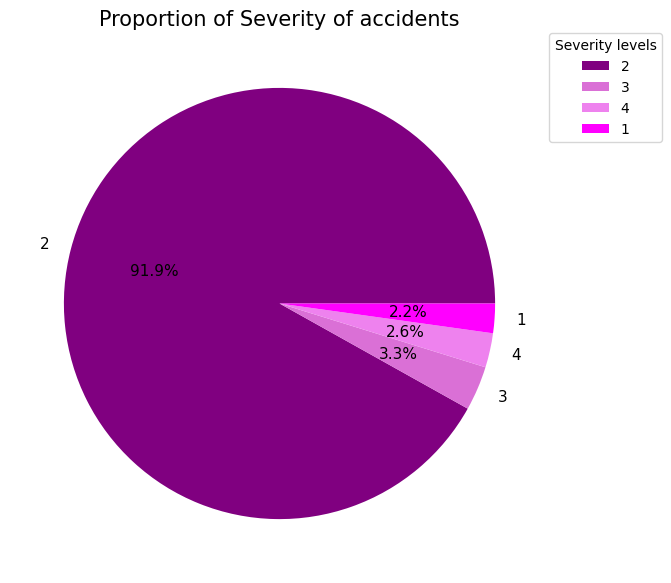

In [28]:
plt.figure(figsize=(7,7))

plt.pie(severity,labels = levels,autopct='%1.1f%%', colors=['purple','orchid','violet','magenta'],textprops={'fontsize': 11, 'color': 'black'})
plt.title('Proportion of Severity of accidents',fontsize=15)
plt.legend(title='Severity levels', loc=(1,0.8), fontsize='medium');


###**Atmospheric conditions**

#### **Q: What is the average Wind Chill**

Mean: 62.63611206128605
Median: 66.0


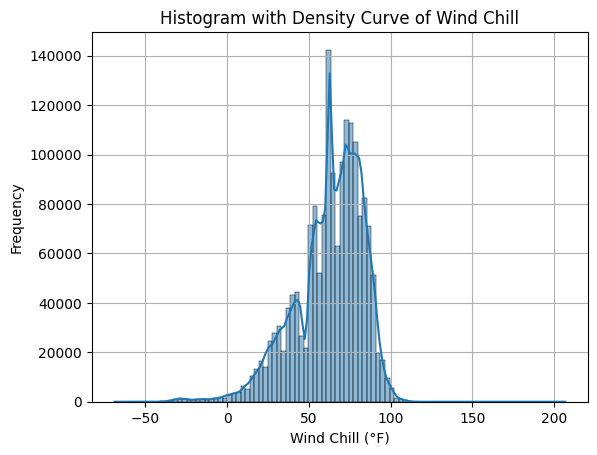

In [29]:
print('Mean:', df['Wind_Chill(F)'].mean())
print('Median:', df['Wind_Chill(F)'].median())
sns.histplot(df['Wind_Chill(F)'], kde = True, bins = 100)
plt.xlabel('Wind Chill (°F)')
plt.ylabel('Frequency')
plt.title('Histogram with Density Curve of Wind Chill')
plt.grid(True);

**Conclusion:**
- On an average the wind chill was **62.63 F** which is 17.02 Celsius and
median was **66.0 F** i.e. 18.89 Celsius.
This tells us that there was on an average cold winds throughout which significantly dropped the average wind chill.

Mean: 63.799034693219085
Median: 66.0


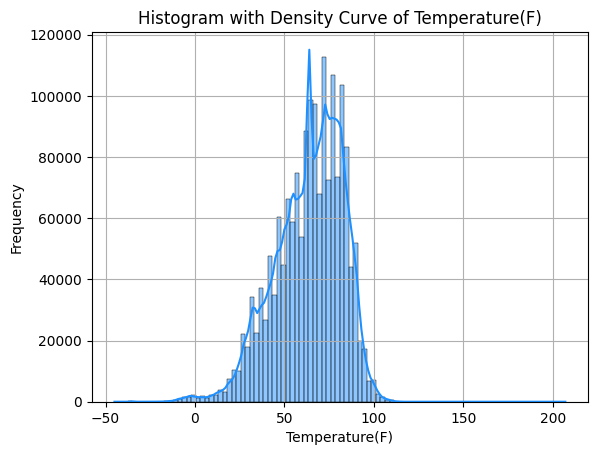

In [30]:
print('Mean:', df['Temperature(F)'].mean())
print('Median:', df['Temperature(F)'].median())
sns.histplot(df['Temperature(F)'], kde = True, color='dodgerblue', bins = 100)
plt.xlabel('Temperature(F)')
plt.ylabel('Frequency')
plt.title('Histogram with Density Curve of Temperature(F)')
plt.grid(True);

### **Wind Direction and accidents**

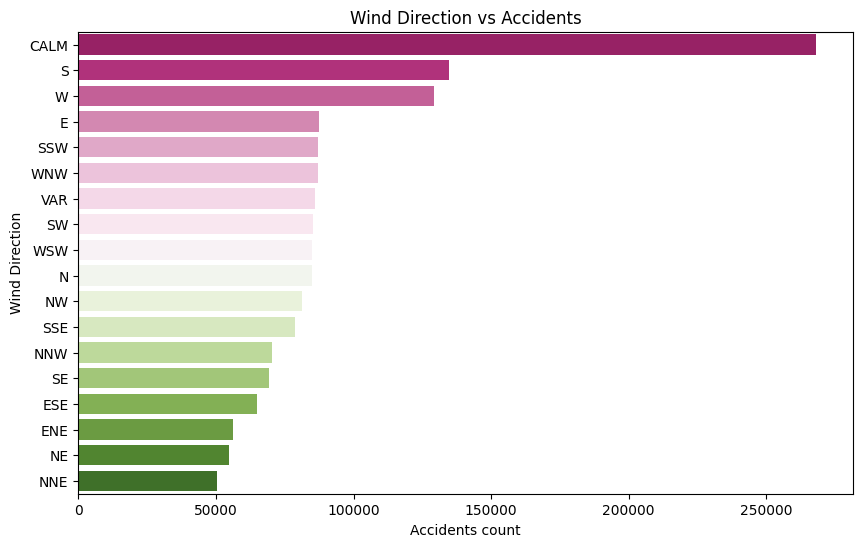

In [31]:
wind_directions = df['Wind_Direction'].value_counts()
plt.figure(figsize = (10,6))
sns.barplot(x=wind_directions.values, y =wind_directions.index, palette = 'PiYG')
plt.xlabel('Accidents count')
plt.ylabel('Wind Direction')
plt.title('Wind Direction vs Accidents');

**Conclusion** :

The most frequent wind directions are represented by the abbreviations CALM, S, and W, indicating **calm winds, south winds, and west winds**, respectively. These directions have significantly higher frequencies compared to others, suggesting that they are prevalent in the area.

**Impact on Weather :** Wind direction plays a crucial role in determining weather patterns and local climate conditions. Certain wind directions may be associated with specific weather phenomena or affect local weather conditions such as temperature, humidity, and precipitation.

**Impact Analysis :** Analyzing wind direction frequencies can help meteorologists, climatologists, and environmental scientists better understand local wind patterns, weather dynamics, and their implications for various aspects including safe conditions to drive amongst other things

#### **Q: What are the 20 main weather conditions for accidents of different severity levels?**

In [32]:
# Filtering out top 20 weather conditions and their corresponding severity levels

severity_1df = df[df['Severity']==1]
top20_weath_con = severity_1df['Weather_Condition'].value_counts().head(20)

severity_2df = df[df['Severity']==2]
top20_weath_con2 = severity_2df['Weather_Condition'].value_counts().head(20)

severity_3df = df[df['Severity']==3]
top20_weath_con3 = severity_3df['Weather_Condition'].value_counts().head(20)

severity_4df = df[df['Severity']==4]
top20_weath_con4 = severity_4df['Weather_Condition'].value_counts().head(20)

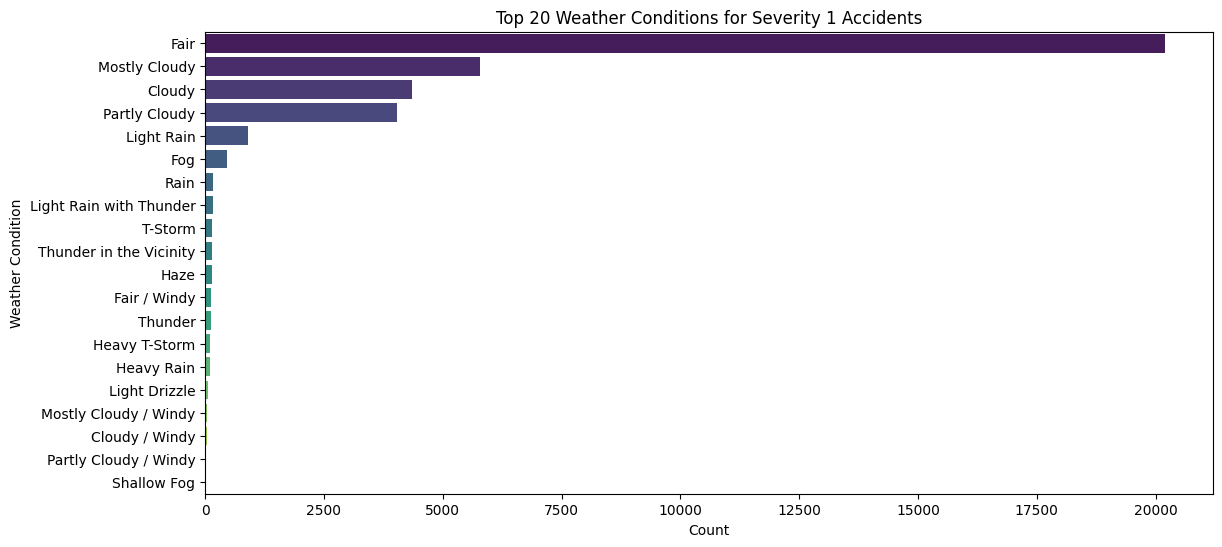

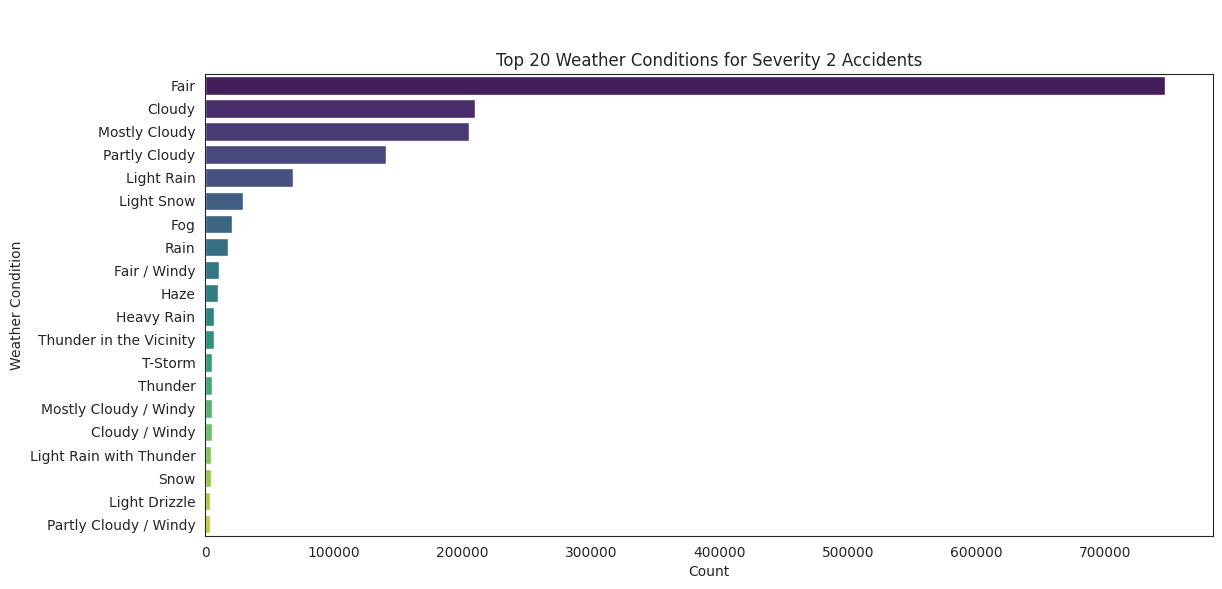

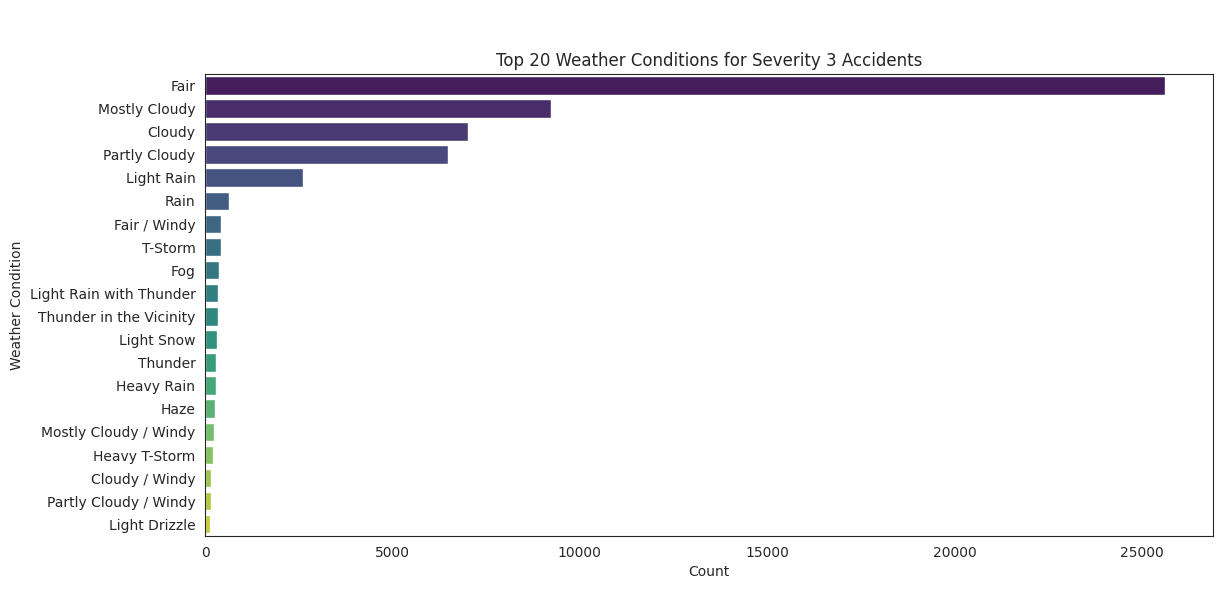

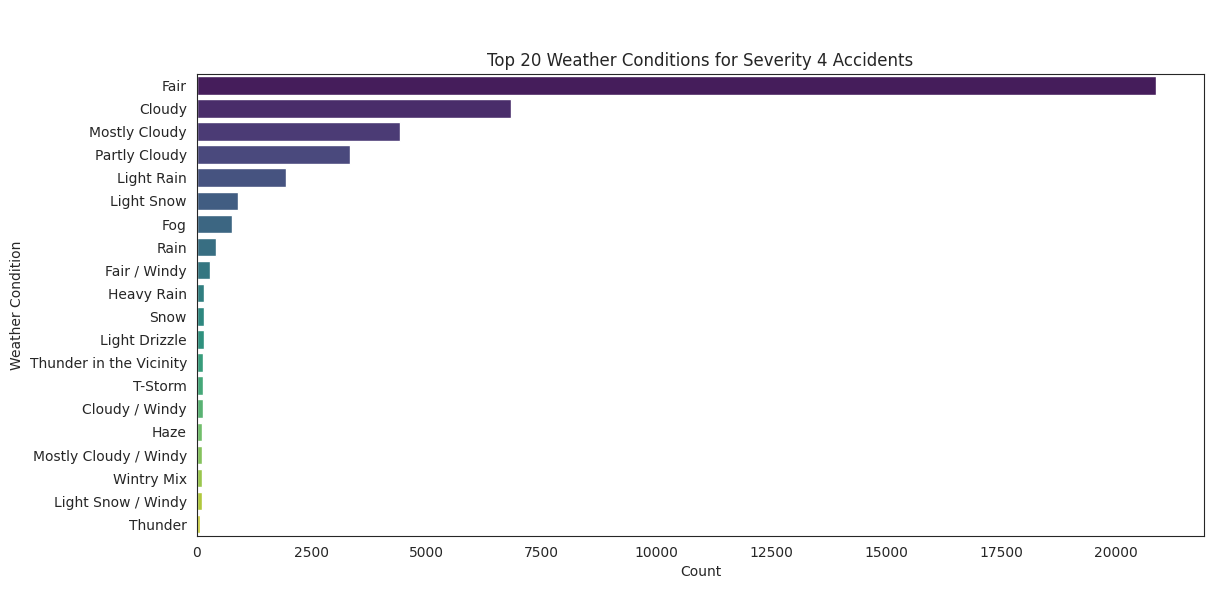

In [33]:
plt.figure(figsize=(13,6))
sns.barplot(x=top20_weath_con.values, y = top20_weath_con.index, palette='viridis')
sns.set_style('white')
plt.title('Top 20 Weather Conditions for Severity 1 Accidents')
plt.xlabel('Count')
plt.ylabel('Weather Condition');


plt.figure(figsize=(13,6))
sns.barplot(x=top20_weath_con2.values, y = top20_weath_con2.index, palette='viridis')
sns.set_style('white')
plt.title('\n\nTop 20 Weather Conditions for Severity 2 Accidents')
plt.xlabel('Count')
plt.ylabel('Weather Condition');


plt.figure(figsize=(13,6))
sns.barplot(x=top20_weath_con3.values, y = top20_weath_con3.index, palette='viridis')
sns.set_style('white')
plt.title('\n\nTop 20 Weather Conditions for Severity 3 Accidents')
plt.xlabel('Count')
plt.ylabel('Weather Condition');

plt.figure(figsize=(13,6))
sns.barplot(x=top20_weath_con4.values, y = top20_weath_con4.index, palette='viridis')
sns.set_style('white')
plt.title('\n\nTop 20 Weather Conditions for Severity 4 Accidents')
plt.xlabel('Count')
plt.ylabel('Weather Condition');

**Conclusion:**

From the above plots the top 5 weather conditions for almost all severity levels are **'Fair', 'Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Light Rain'.**

### **Affect of presence of various factors on Severity of accidents**

In [34]:
factors = ['Amenity', 'Bump', 'Crossing', 'Give_Way','Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop','Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

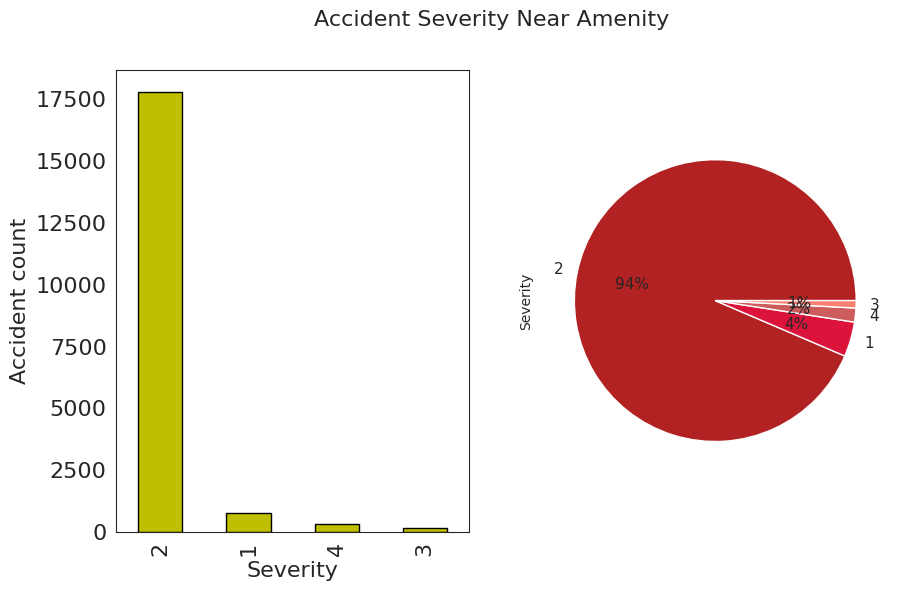

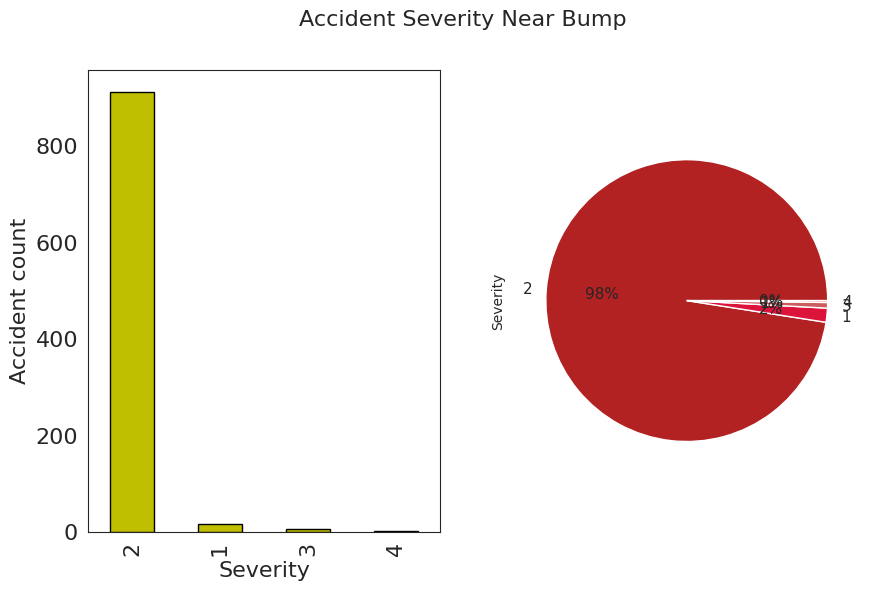

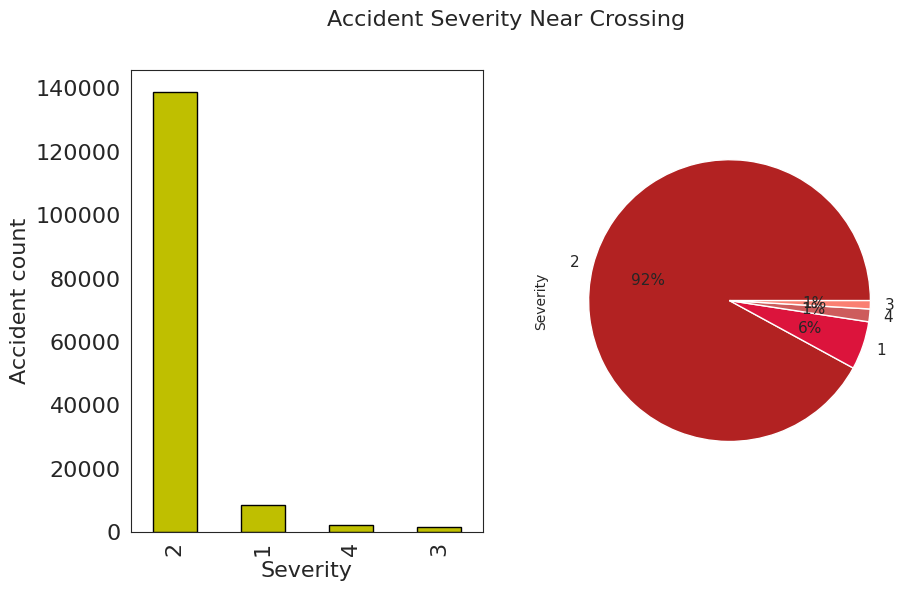

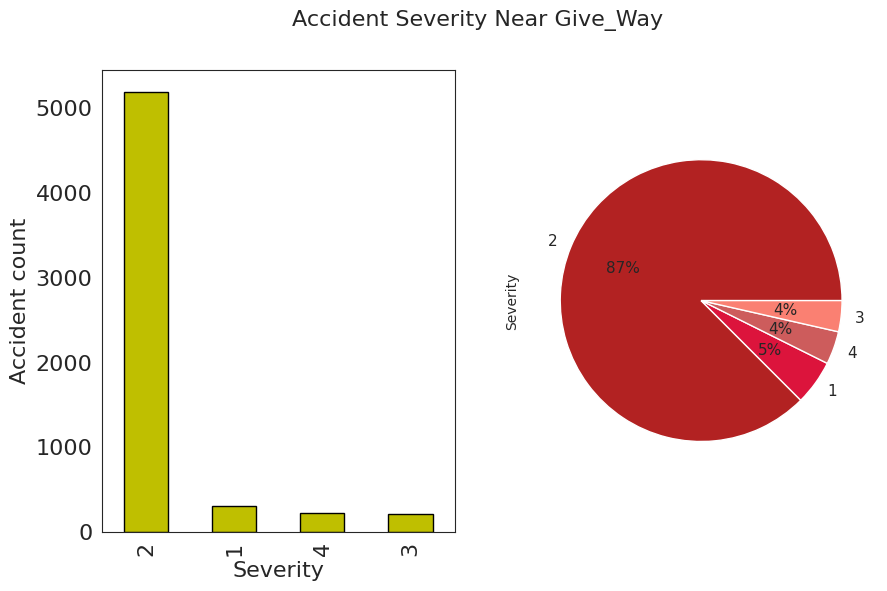

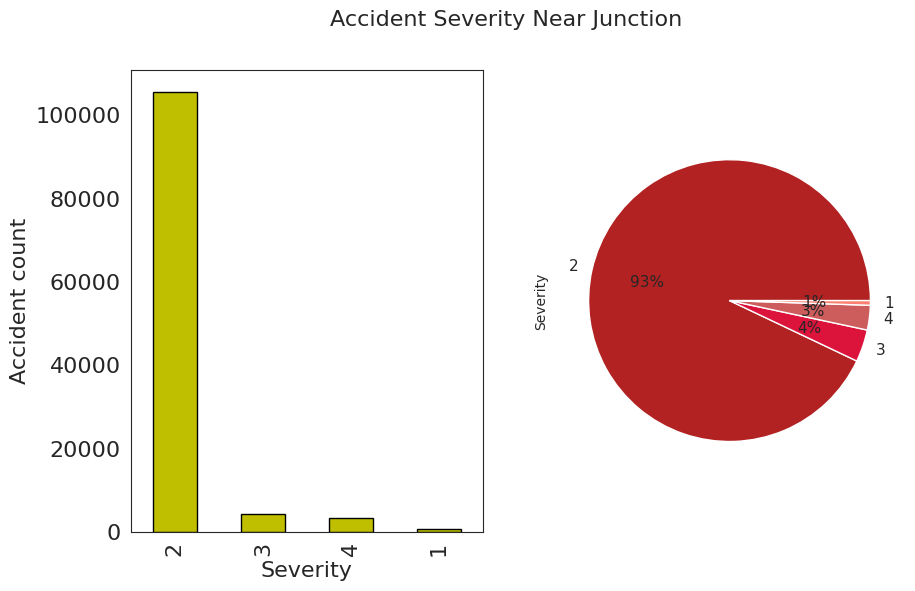

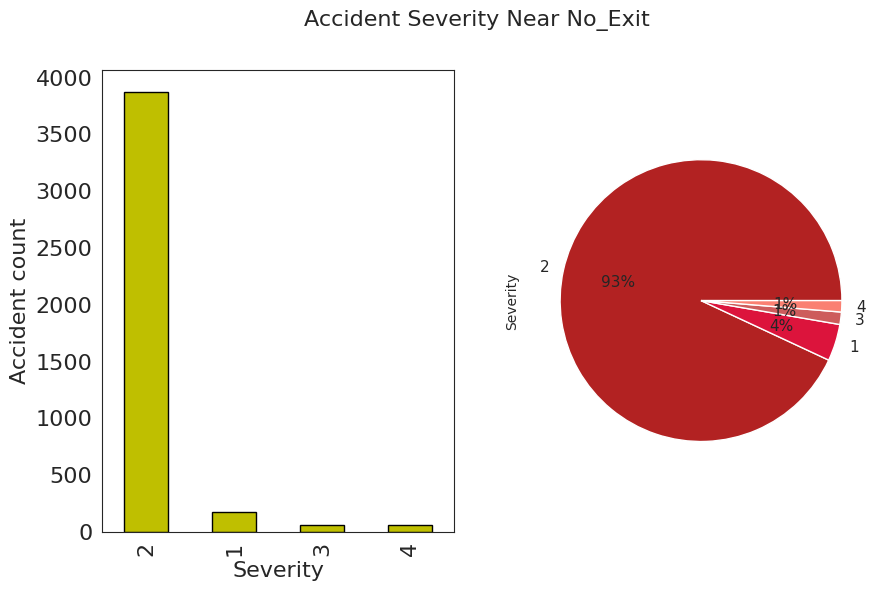

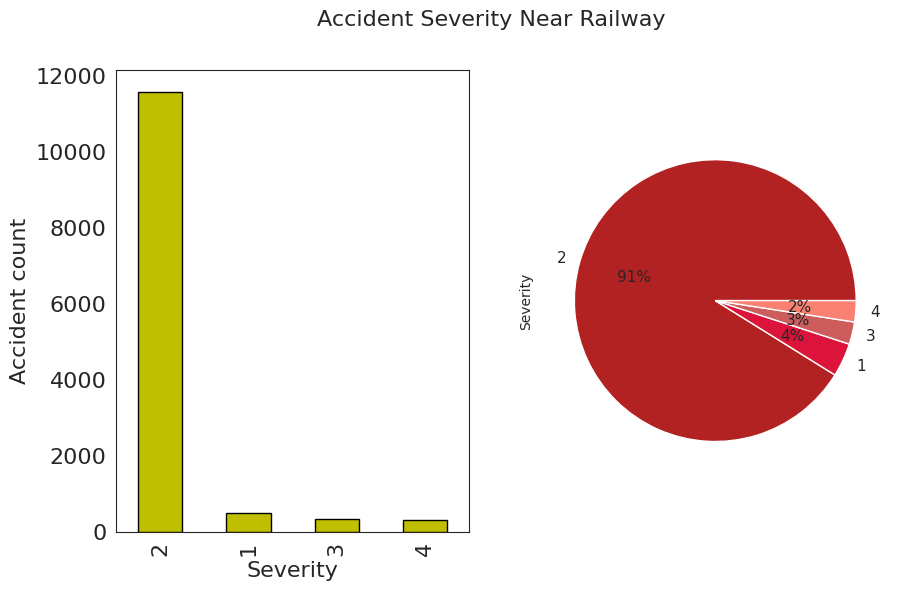

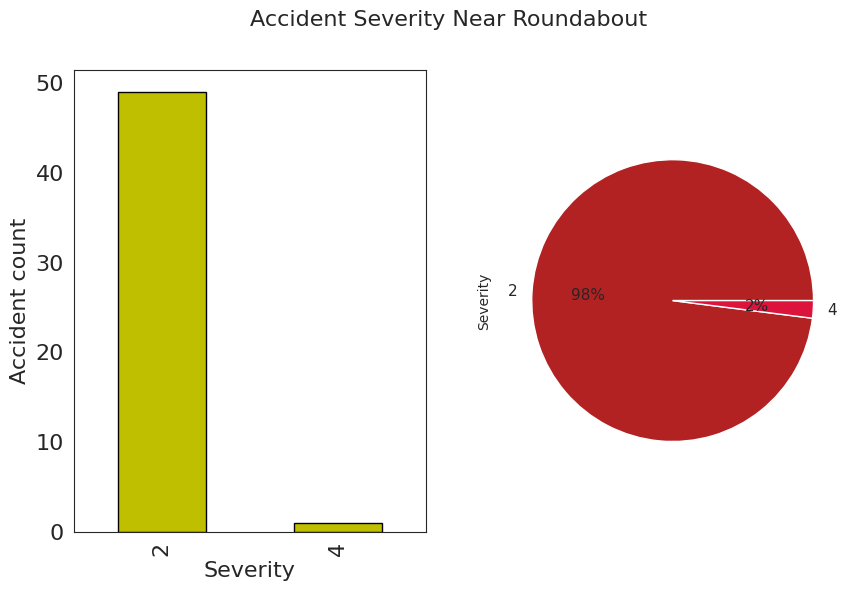

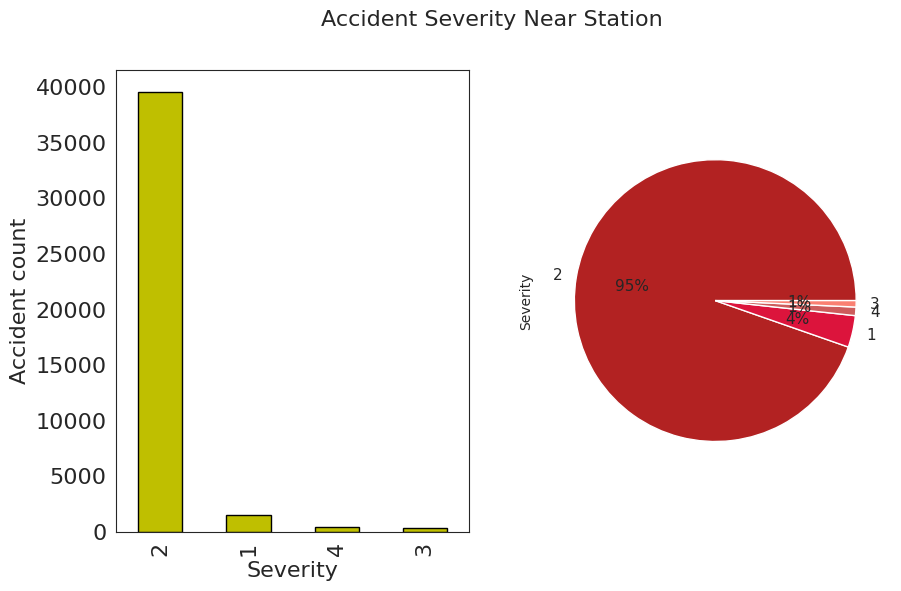

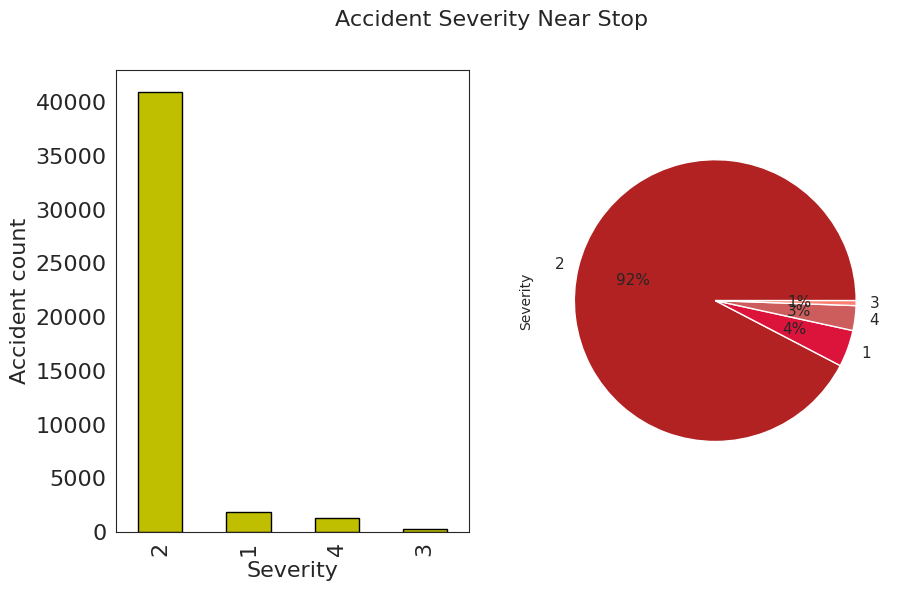

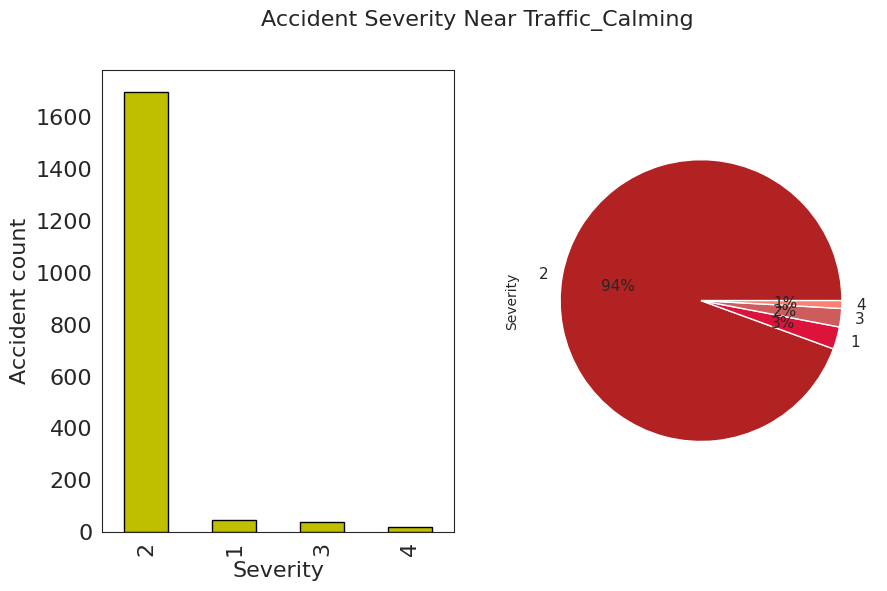

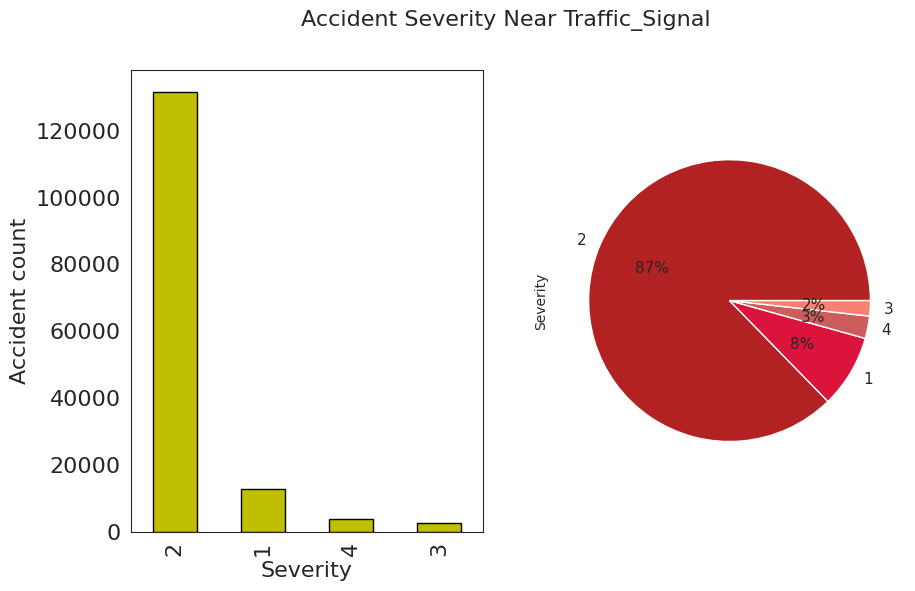

In [35]:
for i in factors:
  if (df[i] == True).sum() >0:
    plt.subplots(1,2,figsize =(10,6))
    plt.xticks(fontsize=14)
    plt.suptitle('Accident Severity Near ' + i, fontsize =16)
    plt.subplot(1,2,1)
    df.loc[df[i] == True]['Severity'].value_counts().plot.bar(width=0.5,color = 'y', edgecolor = 'black')
    plt.xlabel('Severity', fontsize = 16)
    plt.ylabel('Accident count', fontsize =16)
    plt.xticks(fontsize =16)
    plt.yticks(fontsize = 16)
    plt.subplot(1,2,2)

    df.loc[df[i] == True]['Severity'].value_counts().plot.pie(autopct = '%1.0f%%', fontsize =11,colors = ['FireBrick','Crimson','IndianRed','Salmon'])

**Conclusion:**
There are various inferences that can be drawn from the above plots:
 - **Severity** : In most cases the accidents that occures were of Severity level 2 that means they were relatively minor and less fatal. Almost all accidents reported near the various road infrastructure factors had majority share of Severity level 2 accidents.

- **Highest Accidents factors :** There are some factors where the accidents were a bit more severe and huge in number like- ***junction, traffic signal, stop***.

- **Safety Measures and Infrastructure** : It may suggest that safety measures or infrastructure in place are effective at mitigating the severity of accidents for certain factors. For example, factors like ***traffic signals, crossings*** might contribute to reducing the severity of accidents by enforcing rules, improving visibility, or slowing down traffic.



### **Correlation Matrix**

Correlation : Strength of linear relationship between two variables. The sign of the linear correlation coefficient indicates the direction of the linear relationship between the variables. The strength of the relation depends on the coefficients value, more closer to 1 more stronger.

  -  A value closer to **+1** incidcates **Strong positive Correlation** i.e. if one variable changes the other one also changes in the same direction
  - A value closer to **-1** indicates **Strong negative correlation** i.e. if one variable changes the other one also changes in the oppposite direction
  
Below we have shown the Correlation Matrix of all the numerical columns of the data. This matrix tell us which columns are more correlated to each other and in which direction.

In [36]:
num_cols=df.select_dtypes(include="number").columns.tolist()
correlation_matrix_1=df[num_cols].corr()

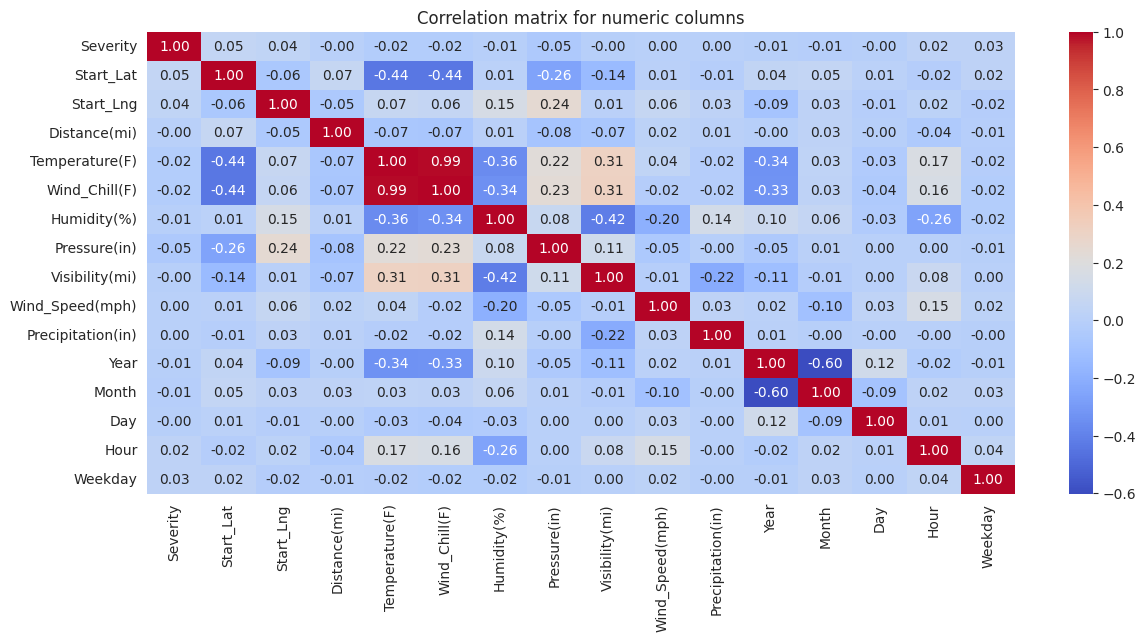

In [37]:
plt.figure(figsize = (14,6))
sns.heatmap(correlation_matrix_1, annot=True,cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix for numeric columns");

### **Hypothesis Testing**

**Hypothesis 1**
- Null Hypothesis : There is no significant difference between the average distance (in miles) of severity 4 accidents and the mean poplulation distance
- Alternate Hypothesis: There is a significant difference between the average distance (in miles) of severity 4 accidents and the mean poplulation distance

In [38]:
# Perform one-sample t-test

from scipy import stats

severity_4_distances = df[df['Severity'] == 4]['Distance(mi)']
mean_distance = round(df['Distance(mi)'].mean(),2)


t_statistic, p_value1 = stats.ttest_1samp(severity_4_distances, mean_distance )
print("P-value:", p_value1)

# Significance level
alpha = 0.05

if p_value1 < alpha:
    print(f"Reject the null hypothesis and suggest that the mean distance of accidents with severity 4 is significantly different from mean population distance.")
else:
    print(f"Fail to reject the null hypothesis and suggest that the there is no significant difference between the mean distance of accidents with severity 4 and the mean population distance.")


P-value: 3.652505135389151e-11
Reject the null hypothesis and suggest that the mean distance of accidents with severity 4 is significantly different from mean population distance.


#### What is the actual mean distance of severity 4 accidents?

In [39]:
# Calculate mean distance for severity 4 accidents

severity_4_distances = df[df['Severity'] == 4]['Distance(mi)']
mean_distance_severity_4 = severity_4_distances.mean()

print("Mean Distance for Severity 4 Accidents:", mean_distance_severity_4)
print("The difference from Population distance is:", mean_distance - mean_distance_severity_4)

Mean Distance for Severity 4 Accidents: 0.8518117022934859
The difference from Population distance is: 0.07818829770651414


###### The difference is not that big suggesting the average Severity 4 accident distance is pretty close the population average but not more than average.

#### What is the Average Severity of accidents in the evening peak hours?

In [40]:
# Average Accident Severity during evening peak hours

peak_hr_accidents = df[(df['Hour'] >= 15) & (df['Hour'] <= 18)]
average_severity =peak_hr_accidents['Severity'].mean()

print("Average Severity during evening peak hours:", average_severity)

Average Severity during evening peak hours: 2.058543421204571


**Hypothesis 2**

- Null Hypothesis: There is no significant difference in the mean distances between severity 1 and severity 4 accidents during rain.

- Alternate Hypothesis: There is a significant difference in the mean distances between severity 1 and severity 4 accidents during rain.

In [41]:
from scipy.stats import ttest_ind

severity_4_rain = df[(df['Severity'] == 4) & (df['Weather_Condition']=='Rain')]
severity_1_rain = df[(df['Severity'] == 1) & (df['Weather_Condition']=='Rain')]

t_stat, p_value2 = ttest_ind(severity_4_rain['Distance(mi)'],severity_1_rain['Distance(mi)'])
print("T-test p-value:", p_value2)

alpha = 0.05

if p_value2 < alpha:
  print("Reject the null hypothesis and suggest that there is a significant difference between the distance of two during rain.")
else:
  print("Fail to reject null hypothesis and suggest that there is no significant difference between the distance of two during rain. ")

T-test p-value: 7.884769414974283e-11
Reject the null hypothesis and suggest that there is a significant difference between the distance of two during rain.


### Difference between the effect of presence or absence of selected three infrastructural elements on severity levels

In [42]:
from scipy.stats import ttest_ind

# Make a subset of dataframe to only include accidents involving special infrastructural elements
infra_accidents = df[(df['Traffic_Signal'] == True) | (df['Crossing'] == True) | (df['Roundabout']) == True]

# Splitting data into different factors and their respective severity data
traffic_signal_accidents = infra_accidents[infra_accidents['Traffic_Signal'] == True]['Severity']
no_traffic_signal_accidents = infra_accidents[infra_accidents['Traffic_Signal'] == False]['Severity']

crossing_accidents = infra_accidents[infra_accidents['Crossing'] == True]['Severity']
no_crossing_accidents = infra_accidents[infra_accidents['Crossing'] == False]['Severity']

roundabout_accidents = infra_accidents[infra_accidents['Roundabout'] == True]['Severity']
no_roundabout_accidents = infra_accidents[infra_accidents['Roundabout'] == False]['Severity']


#### **One-Way ANOVA (Analysis of Variance)**

**Null Hypothesis:** There is no significant difference in the mean severity among the groups with or without the different infrastructural elements ('Traffic_Signal','Crossing','Roundabout').

**Alternate Hypothesis:** There is a significant difference in the mean severity among the groups with or without the different infrastructural elements ('Traffic_Signal','Crossing','Roundabout').

In [43]:
from scipy.stats import f_oneway
f_stat, p_value3 = f_oneway(traffic_signal_accidents, no_traffic_signal_accidents,
                                  crossing_accidents, no_crossing_accidents,roundabout_accidents, no_roundabout_accidents)
print('p-value: ',p_value3)
alpha = 0.05

if (p_value3 < alpha):
  print('Reject the null hypothesis and suggest that there is a significant difference in the mean severity among at least one pair of the groups with or \nwithout infrastructural elements')
else:
  print('Fail to reject the null hypothesis and suggest that there is no significant difference in the mean severity among the groups with or \nwithout infrastructural elements.')

p-value:  3.1233879486056765e-35
Reject the null hypothesis and suggest that there is a significant difference in the mean severity among at least one pair of the groups with or 
without infrastructural elements


#### **Independent t-test**

From the above ANOVA results we got to know that there is a significant difference in the average severity levels among at least one pair out of the three groups with or without that particular infrastructural element.

Now, with the help of Independent t-test, which can be used to compare the means of two specific groups directly and determine if there is a statistically significant difference between them, we can find out which group out of the above do not have much difference in the mean severity.

**Null Hypothesis:** There is no significant difference in the mean severity between groups with and without a particular infrastructure element (e.g., traffic signal, crossing, roundabout).

**Alternative Hypothesis:** There is a significant difference in the mean severity between groups with and without a particular infrastructure element.



In [44]:
from scipy.stats import ttest_ind
t_stat_traffic, p_value_traffic = ttest_ind(traffic_signal_accidents, no_traffic_signal_accidents)
t_stat_crossing, p_value_crossing = ttest_ind(crossing_accidents, no_crossing_accidents)
t_stat_roundabout, p_value_roundabout = ttest_ind(roundabout_accidents, no_roundabout_accidents)

print("T-test p-values for Traffic Signal:", p_value_traffic)
print("T-test p-values for Crossing:", p_value_crossing)
print("T-test p-values for Roundabout:", p_value_roundabout)


T-test p-values for Traffic Signal: 9.243102262144384e-14
T-test p-values for Crossing: 6.304754697778061e-27
T-test p-values for Roundabout: 0.3774399718980166


**Traffic Signal:**

p-value: 9.24e-14

***Decision:*** p-value < 0.05, Reject the null hypothesis and suggest there is a significant difference in severity between accidents that occur at locations with traffic signals and those that do not.

**Crossing:**

p-value: 6.30e-27

***Decision:*** p-value < 0.05, Reject the null hypothesis and suggest there is a significant difference in severity between accidents that occur at locations with Crossing and those that do not.

**Roundabout:**

p-value: 0.377

***Decision:*** p-value > 0.05, Fail to reject the null hypothesis and suggest there is no significant difference in severity between accidents that occur at locations with roundabouts and those that do not.

With this we can conclude, that these results suggest that there is a significant association between certain **infrastructure elements** (such as traffic signals and crossings) and **accident severity**, while the presence of roundabouts does not seem to have a significant impact on severity.
This does not necessarily imply that roundabouts are ineffective as traffic control measures; rather, it suggests that their influence on accident severity may be less pronounced compared to other infrastructure elements like traffic signals and crossings.
We can do similar analysis with other types of infrastructure factors also to find out which had the most difference in the average severity levels.

### **Logistic Regression**

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
# Create feature list of predictor variables

feature_list = ['Severity','Start_Lat','Distance(mi)','City','County','State','Wind_Chill(F)','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)',
                'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station',
                'Traffic_Calming','Traffic_Signal','Sunrise_Sunset','Hour','Weekday','Day']

In [47]:
# Create a DataFrame of the above list and make a copy of it
df_classification = df[feature_list].copy()

# Check for Null values
df_classification.isnull().mean()

Severity             0.000000
Start_Lat            0.000000
Distance(mi)         0.000000
City                 0.000029
County               0.000000
State                0.000000
Wind_Chill(F)        0.000000
Temperature(F)       0.000000
Humidity(%)          0.000000
Pressure(in)         0.000000
Visibility(mi)       0.000000
Wind_Direction       0.028402
Weather_Condition    0.022766
Amenity              0.000000
Bump                 0.000000
Crossing             0.000000
Give_Way             0.000000
Junction             0.000000
No_Exit              0.000000
Railway              0.000000
Roundabout           0.000000
Station              0.000000
Traffic_Calming      0.000000
Traffic_Signal       0.000000
Sunrise_Sunset       0.008069
Hour                 0.000000
Weekday              0.000000
Day                  0.000000
dtype: float64

In [48]:
# Drop Null values
df_classification.dropna(subset=df_classification.columns[df_classification.isnull().mean() != 0], inplace=True)

In [49]:
# Select a state to perform the training and testing
state ='NY'

## Create a new DataFrame (df_state_NY) that contains a copy of the rows from df_classification where the 'State' column is 'NY'.
df_state_NY = df_classification.loc[df_classification.State == state].copy()
df_state_NY.drop('State',axis = 1, inplace =True)

In [50]:
# Set county
county = 'New York'

df_county = df_state_NY[df_state_NY['County'] == county].copy()
df_county.drop(['County'],axis =1,inplace =True)

In [51]:
# dummy creation, drop one of the resulting dummy variables for each categorical feature.
df_county_dummy = pd.get_dummies(df_county, drop_first =True)

# Set target variable
target = 'Severity'

# data frame of dummies
dataF= df_county_dummy.copy()

# extract 'target' variable from above data frame and store it in 'y'
y = dataF[target]

# Remove the target variable from the list of predictor variables
X = dataF.drop(target,axis =1)

In [52]:
# Splitting the data set into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=21, stratify = y)

In [53]:
logisticRegression = LogisticRegression(random_state = 0)
logisticRegression.fit(X_train, y_train)
y_pred = logisticRegression.predict(X_test)
acc_sc = accuracy_score(y_test, y_pred)

print(f'Logistic Regression algorithm, accuracy score: {acc_sc:.3f}')

Logistic Regression algorithm, accuracy score: 0.973


**Objective:** The objective of the logistic regression analysis was to predict the severity of accidents in the **New York** county of the **NY** state, based on various features such as weather conditions, road infrastructure, and environmental factors.

**Methodology:**

Logistic regression was chosen as the predictive model due to its ability to handle binary classification tasks effectively.

The dataset was preprocessed to handle missing values and encode categorical variables.

Features such as temperature, pressure, humidity, and visibility were used to train the logistic regression model.

Data being very large, The model was trained on a subset of the data i.e. 'New York' county of New York (NY) state and evaluated it using a test set.

**Results:**

The logistic regression model achieved an impressive accuracy score of approximately 0.973 on the test set.

**Real-World Implications:**

- The high accuracy of the logistic regression model indicates its potential usefulness in real-world applications.

- By accurately predicting accident severity, the model can assist in risk assessment and resource allocation for emergency response teams.

- Insights gained from the model can guide policymakers and urban planners in implementing targeted interventions to improve road safety.

- The analysis highlights the importance of data-driven approaches in addressing road safety challenges and reducing the frequency and severity of accidents.
- By leveraging predictive models, stakeholders can make informed decisions to enhance public safety and minimize the impact of accidents on communities.



## **Conclusion and Solutions :**

In addition to the points discussed above below are some solutions that can be implemented by the administration in order to reduce accidents or at least reduce the severity of them. From our analysis we have found some major issues that need to be discussed as a conclusion to this project.
The continuing evolution of automotive technology aims to deliver even greater safety benefits than earlier technologies, hence, incorporating such technologies on a broader level and doing so in time could increase road safety.

  **-Vehicle-to-Vehicle (V2V) Communication:**

  V2V communication allows vehicles to wirelessly exchange information with nearby vehicles, such as their speed, position, and direction.

  - Key Features:
    - Early Warning: V2V systems provide early warning of potential collision risks by sharing real-time data about nearby vehicles' movements.
    - Collision Avoidance: By analyzing incoming data from neighboring vehicles, V2V-equipped vehicles can anticipate and respond to potential hazards, helping to avoid collisions.
    - Enhanced Safety: V2V communication enhances overall road safety by facilitating cooperative collision avoidance strategies and reducing the likelihood of accidents caused by human error.

  Examples: Applications of V2V communication include intersection collision warning, blind spot warning, and cooperative adaptive cruise control.

**Advanced Driver Assistance Systems (ADAS):**

  ADAS features are designed to assist drivers in operating their vehicles more safely by providing additional situational awareness and automated assistance.

  - Key Features:

    - Automatic Emergency Braking (AEB): Automatically applies the brakes to prevent or mitigate collisions with obstacles, vehicles, or pedestrians detected in the vehicle's path.

    - Lane Departure Warning (LDW): Alerts the driver if the vehicle drifts out of its lane without signaling, helping to prevent lane departure accidents. Potential accidents while changing lanes is the Blind Spot Warning which signals the driver if there is a vehicle in their blind spot. There are various versions available of this sensor and the most common type is signaling via symbols or sounds.

    - Adaptive Cruise Control (ACC): Maintains a set speed and distance from vehicles ahead by automatically adjusting the vehicle's speed, reducing the need for manual acceleration and braking.
  - Benefits:

    - Safety Enhancement: ADAS features supplement driver actions and provide an additional layer of safety, particularly in situations where drivers may be distracted or fatigued.

    - Accident Prevention: By continuously monitoring the vehicle's surroundings and detecting potential hazards, ADAS systems can help prevent accidents or mitigate their severity. ADAS features are increasingly being integrated into modern vehicles as standard or optional equipment, contributing to improved road safety overall.

- **Adaptive headlights** : Unpaved roads, dark nights, etc. drastically increase the possibility of an accident. However, with Adaptive Headlights, drives become safer, especially during night time as the headlights move according to the movement of the steering wheel and thereby, adapt to the driving environment.

- **Camera sensors:** At an individual level, vehicles equipped with camera sensors function as drowsiness detectors, wherein the camera is monitoring the drivers' eyelids and tracks their head movements to gauge if they are tired or drowsy. Tiredness or drowsiness of drivers leads to distracted driving which is a major cause of road accidents. This camera set-up will enable the drivers to rectify their situation by sending them alerts or warnings.

- **Enhanced Emergency Services**

  A leading cause of road fatalities is delayed medical care and technologies have now been designed to solve this issue. It ensures that proper medical treatment reaches the concerned victims with minimal loss of time. Vehicles are now equipped with different features to help this cause. Some vehicles can send instant messages to different parties in the event of an unfortunate incident. While others have the ability to send a list of potential injuries to ensure correct treatment accordingly. Such a system helps in reducing the time required for emergency health care to reach the place of the accident, especially on roads and lanes with lesser traffic.

- **Pedestrian Infrastructure:** Enhance pedestrian infrastructure with cameras, cameras that are used with traffic lights by countries like the U.K. to identify a larger number of pedestrians waiting to cross the road and lengthen the period the 'walk' symbol is on. This helps in mainly controlling collisions with pedestrians and helps improve safety and encourage walking as a mode of transportation.
- **Public Awareness Campaigns:**

    - Launch public awareness campaigns to encourage drivers to plan their trips, use alternate modes of transportation, and avoid peak travel times whenever possible. Educating the public about the benefits of traffic management can help reduce congestion and improve safety. Additionaly, drunk driving is a leading cause of accidents, awarness campaigns to reduce such cases, deployement of personnels to check drivers' state and imposing huge fines and penalties.

    - Engage influencers: Engage community leaders, and influencers to promote road safety among their peers and followers. Peer influence can be a powerful tool in encouraging individuals to adopt safer behaviors on the road.
    - Incentives for Safe Driving: Introduce incentives for safe driving behaviors such as discounts on insurance premiums for drivers with a clean record, rewards for completing defensive driving courses, and recognition programs for communities with low accident rates.

